# Deutsch-Jozsa Algorithm

In this notebook, we will implement the Deutsch-Jozsa algorithm using Qiskit. The Deutsch-Jozsa algorithm is a quantum algorithm that determines whether a given function is constant or balanced with a single query, showcasing the power of quantum computing over classical methods.
We are going to follow the Ket.G youtube video on [Deutsch-Jozsa algorithm](https://www.youtube.com/watch?v=HkpbbDw0rWI).

In [19]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

We are going to split the circuit into 3 distinct parts:
1. **Initialization**: Prepare the qubits in the required initial state.
2. **Oracle Implementation**: Implement the oracle that encodes the function.
3. **Measurement**: Measure the qubits to determine the nature of the function.

## 1. Initialization

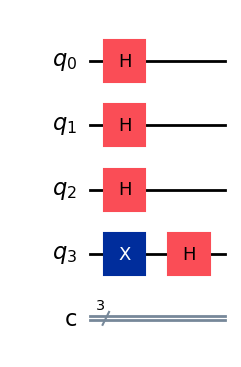

In [20]:
circ = QuantumCircuit(4, 3)
circ.x(3)
circ.h([0, 1, 2, 3])
# circ.h(range(4)) Is the same as above
circ.draw('mpl')

## 2. Oracle Implementation

This Oracle was provided by Ket.G youtube video on Deutsch-Jozsa algorithm.

### Constant Function

The function is the constant function f(x) = 1.

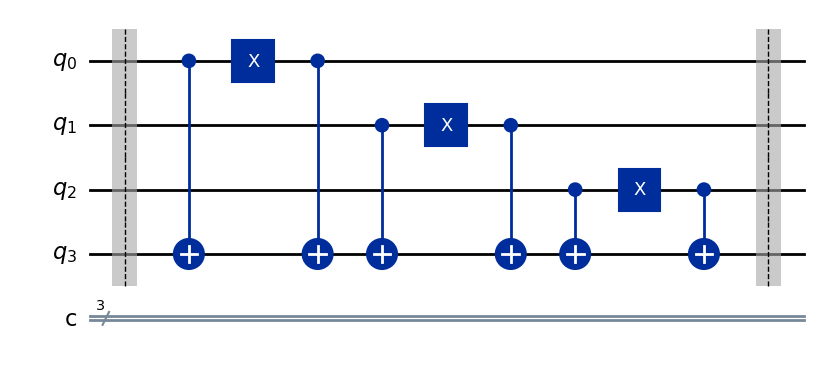

In [21]:
circ2 = QuantumCircuit(4, 3)
circ2.barrier(range(4))
circ2.cx(0, 3)
circ2.x(0)
circ2.cx(0, 3)
circ2.cx(1, 3)
circ2.x(1)
circ2.cx(1, 3)
circ2.cx(2, 3)
circ2.x(2)
circ2.cx(2, 3)
circ2.barrier(range(4))
circ2.draw(output='mpl')

## 3. Measurement

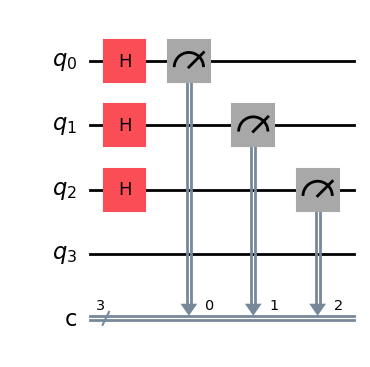

In [22]:
circ3 = QuantumCircuit(4, 3)

circ3.h((0, 1, 2))
circ3.measure((0, 1, 2), (0, 1, 2))
circ3.draw('mpl')

In Qiskit, we can add circuits together easily using the `compose` method. This allows us to combine the initialization, oracle, and measurement circuits into a single circuit for execution.

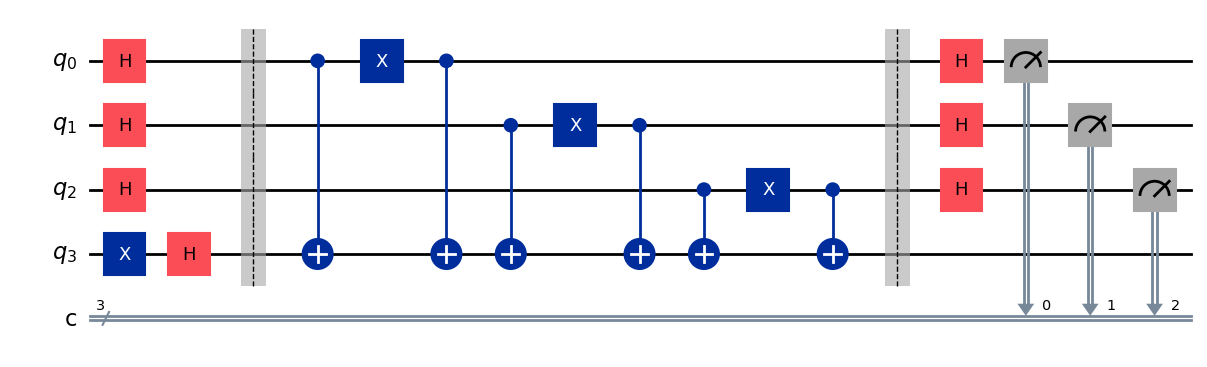

In [23]:
circ = circ.compose(circ2).compose(circ3)
circ.draw('mpl')

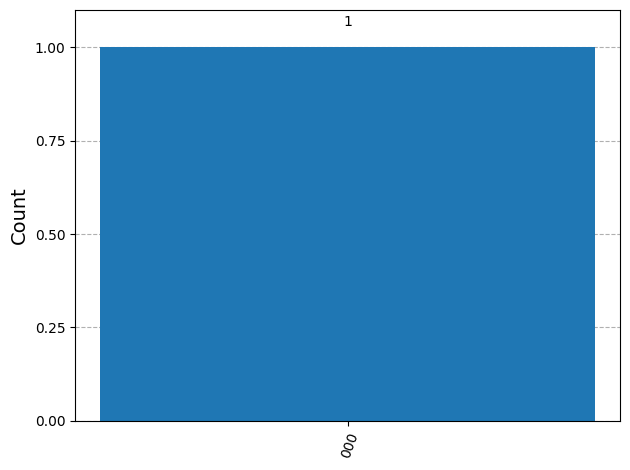

In [25]:
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(circ, backend)
job = backend.run(qc_transpiled, shots=1)
result = job.result()
counts = result.get_counts(qc_transpiled)
plot_histogram(counts)

As we can see, the result of the measurement is `000`, indicating that the function is constant.

### Balanced Function

Now we are using a balanced function, for this time our oracle will count the number of letters that the number in spanish in the binary representation has. If the number is even, the output will be 0, and if the number is odd, the output will be 1. 
- cero = 4 letters f(0) = 0 
- uno = 3 letters f(1) = 1
- dos = 3 letters f(2) = 1
- tres = 4 letters f(3) = 0
- cuatro = 6 letters f(4) = 1
- cinco = 5 letters f(5) = 0
- seis = 4 letters f(6) = 1
- siete = 5 letters f(7) = 0.

As we can see, there are 4 outputs with 0 and 4 outputs with 1, so it is a balanced function.

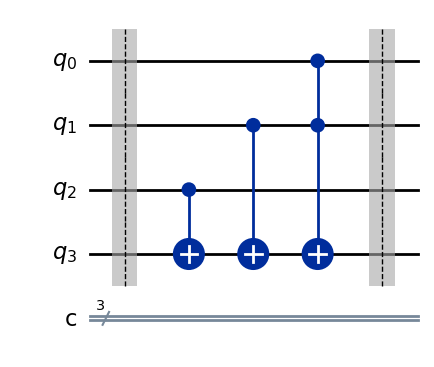

In [26]:
circ4 = QuantumCircuit(4, 3)
circ4.barrier(range(4))
circ4.cx(2, 3)
circ4.cx(1, 3)
circ4.ccx(0, 1, 3)
circ4.barrier(range(4))
circ4.draw('mpl')

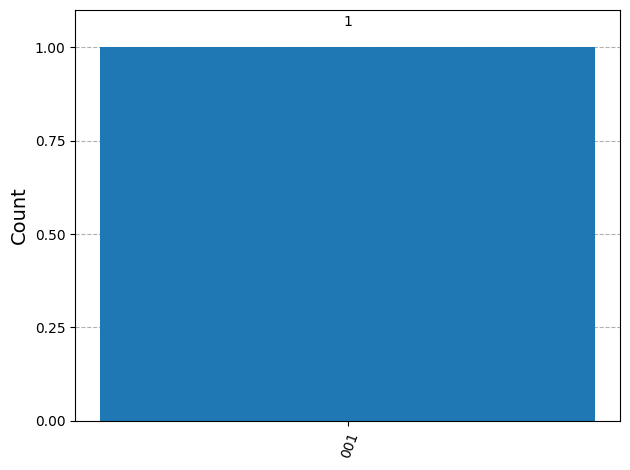

In [28]:
circ = circ.compose(circ4).compose(circ3)
circ.draw('mpl')
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(circ, backend)
job = backend.run(qc_transpiled, shots=1)
result = job.result()
counts = result.get_counts(qc_transpiled)
plot_histogram(counts)

As we can see, the result of the measurement is not `000`, indicating that the function is balanced.